<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/SQL/Database_Oracle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.oracle.com/database/technologies/xe-prior-releases.html  
Oracle Database 11gR2 Express Edition for Windows x64  
stup.exe 관리자권한으로 실행  
비번 admin1234

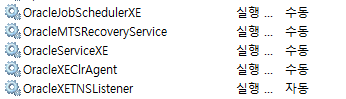

- 1521 : client가 접근할 수 있도록 제공해주는 객체, listener가 죽어있으면 client가 접근이 불가, c드라이브 - product - server - network - ADMNIN - listener.ora와 tnsnames.ora 파일을 열어봐서 HOST이름이 한글이면 IP주소로 바꿔주기
- 8080 : 서버의 포트, Tomcat(c드라이브 - apache-tomcat-9.0.45 - conf - server.xml - 아래부분만 8787로 변경)보다 우선순위  
        <Connector port="8787" protocol="HTTP/1.1"
               connectionTimeout="20000"
               redirectPort="8443" />
- XE : SID(Service ID)

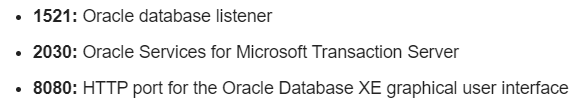

## 3-tier(WAS, web_application, DB Server) 구조
- Client : end 유저
- WAS logs: client 정보와 web_application 정보
- DB Server logs: XE 서비스에 접근한 정보


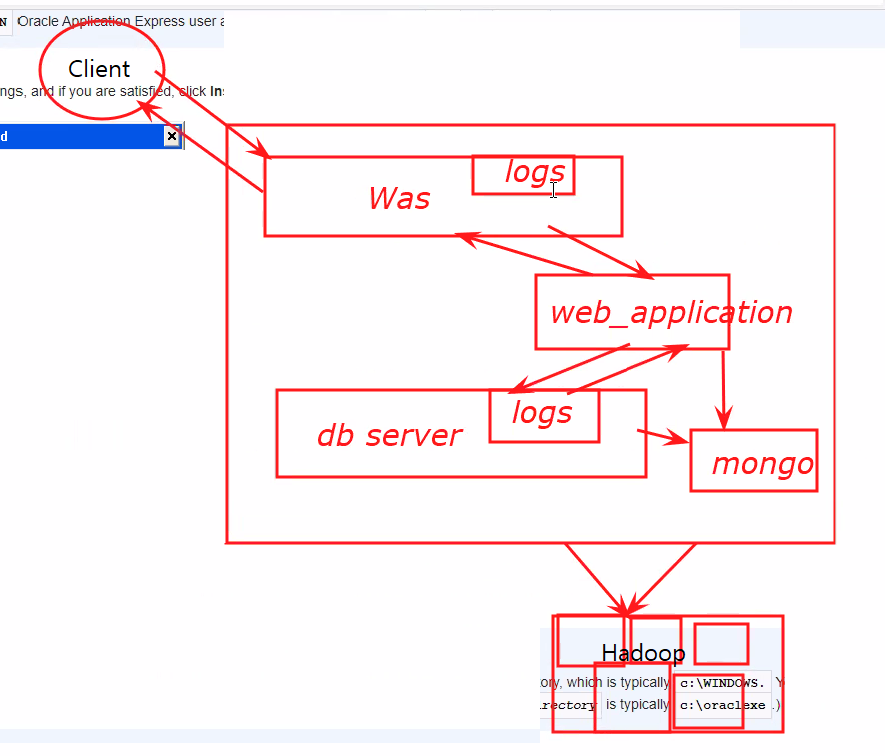

## 로그파일 경로
aa.png

## DB드라이버
- 예를들어, java와 DB를 연결할 때 jdbc 드라이버가 필요

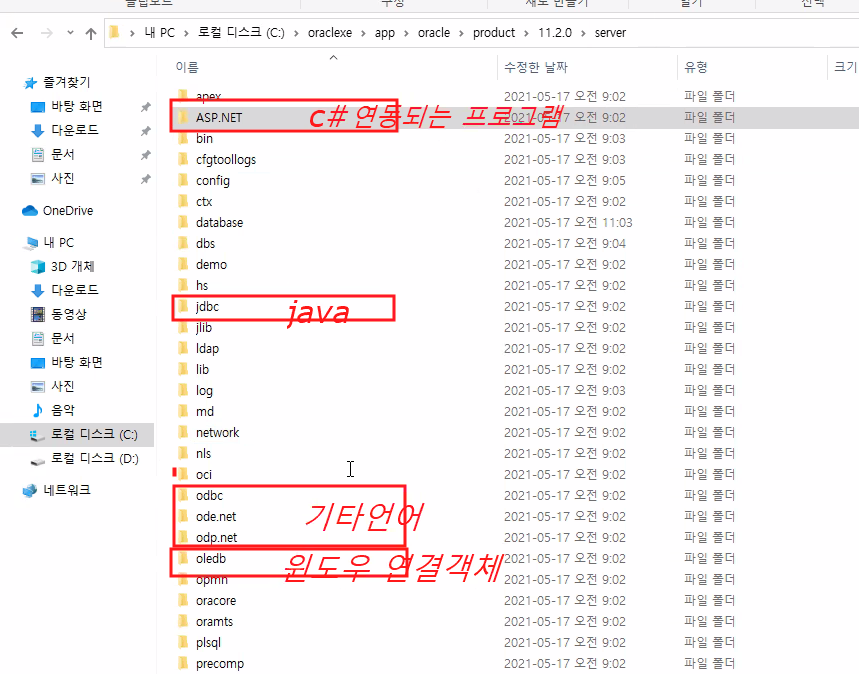

### java와 DB를 연결
C:\oraclexe\app\oracle\product\11.2.0\server\jdbc\lib 여기에 있는 파일 3개를
C:\Program Files\Java\jdk1.8.0_291\jre\lib\ext 와 C:\Program Files\Java\jre1.8.0_291\lib\ext 여기 2곳에 복붙

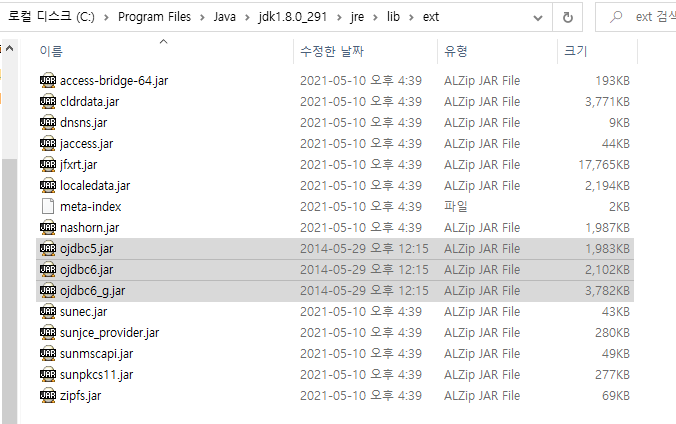

https://docs.oracle.com/cd/E17781_01/admin.112/e18585/toc.htm#XEGSG110  

cmd  
sqlplus  
system  
암호입력: admin1234  
show user  
create user test_user identified by admin1234;  
grant CREATE SESSION, ALTER SESSION, CREATE DATABASE LINK, -
  CREATE MATERIALIZED VIEW, CREATE PROCEDURE, CREATE PUBLIC SYNONYM, -
  CREATE ROLE, CREATE SEQUENCE, CREATE SYNONYM, CREATE TABLE, - 
  CREATE TRIGGER, CREATE TYPE, CREATE VIEW, UNLIMITED TABLESPACE -
  to test_user;  
host 나갔다가  
exit 다시 들어옴  
connect  
test_user  
암호입력: admin1234  
show user  
exit 완전히 나감  
sqlplus test_user/admin1234 한번에 들어옴  
  
@"c:\Test\scott.sql"  
connect  
SCOTT
암호입력: TIGER  
show user  



주석처리 : --

In [ ]:
SELECT 컬럼 or *
FROM 테이블;

In [ ]:
SELECT *
FROM TAB;

In [ ]:
DESC EMP; # 구조 
# 사원테이블(EMP) = 엔티티
# 컬럼 = 속성 = Attribute

In [ ]:
# 사원 테이블의 모든 컬럼 확인
SELECT *
FROM EMP;

In [ ]:
SET PAGES 100
SET NUM 5
COLUMN ENAME FORMAT A10 # 컬럼 너비 조정 # 알파벳 10글자까지만
COLUMN SAL FORMAT 99999

- NUMBER(2) : 정수형 2자리  
- NUMBER(4) : 정수형 4자리  
- NUMBER(7,2) : 실수형 7자리, 소수이하 2자리  
- CHAR(20) : 정적 문자열, 무조건 20자리를 다 메모리에 올림
- VARCHAR2(20) : 가변 문자열, 영문자4천자 한글2천자 중 20개만  
- DATE: 날짜  

- 강한 주종(참조)관계: DEPT(주) - EMP(종)
- 약한 주종관계: 주테이블 중 일부와 참조관계

In [ ]:
SELECT *
FROM EMP, DEPT;

SELECT 컬럼 (AS) 별칭  
FROM 테이블 별칭

In [ ]:
SELECT 사원.ENAME, 부서.DEPTNO, 부서.DNAME
FROM EMP 사원, DEPT 부서;

In [ ]:
SELECT ENAME "사원의 이름", DEPTNO 부서번호, SAL 봉급
FROM EMP;

SELECT ENAME AS "사원의 이름", DEPTNO AS "부서번호", SAL AS 봉급
FROM EMP;

In [ ]:
# 더블쿼터 아니고 싱글이로!
SELECT ENAME||'님'
FROM EMP;

SELECT ENAME||'님은 '||HIREDATE||'일에 입사했다'
FROM EMP;

In [ ]:
# DISTINCT : 해당 컬럼에서 중복제거, 반대는 ALL
SELECT DISTINCT JOB, DEPTNO
FROM EMP;

In [ ]:
SELECT ENAME, SAL*12+COMM
FROM EMP;

In [ ]:
# NULL : 0 또는 공백과 다름, 연산되지 않음, NULL이 하나라도 섞여있으면 결과도 NULL
SELECT COMM, NVL(COMM, 0)
FROM EMP;

SELECT ENAME, SAL*12+NVL(COMM, 0) 연봉
FROM EMP;

In [ ]:
# ASC(오름차순)가 기본
SELECT ENAME
FROM EMP
ORDER BY ENAME ASC; 

SELECT ENAME, SAL
FROM EMP
ORDER BY 2 DESC;

In [ ]:
SELECT ROWID, ENAME
FROM EMP;

In [ ]:
SELECT 100+200
FROM DUAL;

SELECT 2 * 1.23, '3 * 2,34' 
FROM DUAL;

SELECT SYSDATE # 시스템 오늘 날짜 리턴
FROM DUAL;

SELECT SYSDATE, SYSDATE+1 AS 내일
FROM DUAL;

In [ ]:
SELECT ENAME, 'ABC', SAL, 500 
FROM EMP;

In [ ]:
SELECT HIREDATE, HIREDATE+20
FROM EMP;

## Pseudo Column(의사 열)
- 쿼리가 가능한 열
- 수정이나 삭제 안 됨
- order by에 의한 정렬 이전에 부여됨
- rownum : 행의 일련번호
- rowid : 행 id

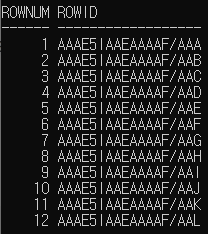

In [ ]:
SELECT ROWNUM, ROWID, ENAME 
FROM EMP
ORDER BY 3; # 기본이 오름차순

## WHERE
- 문자열과 날짜는 작은 따옴표로 묶어서 표시
- WHERE절은 별칭 사용불가
- 테이블의 데이터를 추출하는 필터 역할을 하거나 조인 시 테이블들을 연결하는 조건으로 사용됨
- 산술연산, 비교연산, 컬럼, 숫자, 문자상수, LIKE, IN, BETWEEN, IS (NOT) NULL, 함수, 논리연산자, ANY, ALL

In [ ]:
SELECT *
FROM EMP
WHERE ENAME='FORD';

SELECT EMPNO, ENAME, JOB, SAL
FROM EMP
WHERE JOB = 'MANAGER';

SELECT EMPNO, ENAME, JOB, SAL
FROM EMP
WHERE SAL >= 3000;

SELECT ENAME, JOB, SAL, DEPTNO
FROM EMP
WHERE SAL BETWEEN 1300 AND 1700;

1. AND 연산  
        BETWEEN a AND b  
        expr >= a And expr <= b  
  
2. OR 연산  
        NOT BETWEEN a AND b  
        expr < a OR expr > b  

3. IN 연산  
        IN : =ANY  
        NOT IN : !=ALL

In [ ]:
SELECT EMPNO, ENAME, SAL, HIREDATE
FROM EMP
WHERE EMPNO NOT IN (7902, 7788, 7566);

4. LIKE 연산
- 문자의 패턴이 일치하는 값
- % : 임의 길이의 문자열(공백도 하나의 문자), 0 또는 1개 이상의 문자와 대응
- _ : 한 글자
- ESCAPE : 검색할 문자에 % 또는 _ 문자를 포함할 경우

In [ ]:
SELECT ENAME
FROM EMP
WHERE ENAME LIKE 'F%'; # F로 시작하는 문자 # %F는 F로 끝나는 문자

In [ ]:
SELECT ENAME
FROM EMP
WHERE ENAME LIKE 'W__%D'; # W%D W_%D WARD

In [ ]:
SELECT ENAME
FROM EMP
WHERE ENAME LIKE '_A%'; # 2번째 문자가 A

In [ ]:
CREATE TABLE TEST(
    NAME VARCHAR2(15);
);

DROP TABLE TEST;

In [ ]:
INSERT INTO TEST VALUES('111111');
INSERT INTO TEST VALUES('222222');
INSERT INTO TEST VALUES('333333');
INSERT INTO TEST VALUES(56789);

DELETE FROM TEST;

In [ ]:
INSERT INTO TEST VALUES('HONG_GILDONG');
INSERT INTO TEST VALUES('KIM_GILDONG');
INSERT INTO TEST VALUES('B%GILDONG');
INSERT INTO TEST VALUES('BAE_GILDONG');

SELECT * FROM TEST WHERE NAME LIKE 'B%'; # B%GILDONG 리턴
SELECT * FROM TEST WHERE NAME LIKE '%!_%' ESCAPE '!'; # B%GILDONG만 리턴 안 됨

In [ ]:
SELECT *
FROM EMP
WHERE COMM IS NULL;

## 함수
1. 단일행: 문자함수, 숫자함수, 날짜함수, 변환함수, 기타함수
  - 문자함수: UPPER, LOWER, INITCAP(첫문자만 대문자), CONCAT, SUBSTR, INSTR(특정문자의 위치를 숫자로 리턴), LENGTH, CHR, ASCII(문자를 아스키로 리턴), TRIM
  - 숫자함수: TRUNC(버림), FLOOR(버림인데 -16.8이면 -17로 리턴 / 원래 TRUNC면 -16으로 리턴), ROUND, CEIL(올림인데 -16.8이면 -16으로 리턴 / 원래 ROUND면 -17로 리턴), SIGN(1, -1, 0), MOD(M,N)(M을 N으로 나눈 나머지), ABS(절대값), POWER(M,N)(M의 N승)
  - 날짜함수(7 byte): CENTURY, YEAR, MONTH, DAY, HOURS, MINUTES, SECONDS

2. 다중행 

In [ ]:
SELECT EMPNO, LOWER(ENAME), LOWER(JOB), DEPTNO 
FROM EMP
WHERE ENAME = 'FORD';

In [ ]:
SELECT EMPNO, ENAME, CONCAT(EMPNO, ENAME) ENAME_R
FROM EMP
WHERE DEPTNO = 10;

In [ ]:
SELECT *
FROM EMP
WHERE SUBSTR(ENAME, 1, 1) > 'K' AND SUBSTR(ENAME, 1, 1) < 'Y'
ORDER BY ENAME;

In [ ]:
SELECT INSTR('AVCDEAFAA','A') # 1을 리턴
FROM DUAL;

SELECT INSTR('AVCDEF','Z') # 0을 리턴
FROM DUAL;

In [ ]:
SELECT LTRIM('<========>MINJEONG<=======>', '<>=') # MINJEONG<=======> 리턴
FROM DUAL;

SELECT ENAME, JOB, LTRIM(JOB, 'A'), SAL, LTRIM(SAL, 1)
FROM EMP;

SELECT ENAME, JOB, RTRIM(JOB, 'T'), SAL, RTRIM(SAL, 0)
FROM EMP
WHERE DEPTNO = 10;

In [ ]:
SELECT ENAME, SAL, LPAD(SAL, 10, '*') # 10자리인데 빈공간은 *로 채워줌
FROM EMP
WHERE DEPTNO = 10;

In [ ]:
SELECT ENAME, REPLACE(ENAME, 'SC', '*?') # 통으로 바꾸기
FROM EMP;

SELECT ENAME, TRANSLATE(ENAME, 'SC', '*?') # S는 *로, C는 ?로
FROM EMP;

In [ ]:
SELECT ROUND(456.678) RES1, ROUND(456.678, 0) RES2, ROUND(456.678, 2) RES3, ROUND(2.5) RES4, ROUND(456.678, -2) RES5
FROM DUAL;
# 리턴결과 457  457  456.68  3  500

In [ ]:
SELECT ENAME, HIREDATE
FROM EMP
WHERE HIREDATE >= '81/09/09'; # RR/MM/DD

SELECT ENAME, HIREDATE
FROM EMP
WHERE HIREDATE >= '81-09-09';

SELECT ENAME, HIREDATE
FROM EMP
WHERE HIREDATE >= '1981/09/09';

SELECT ENAME, HIREDATE
FROM EMP
WHERE HIREDATE >= '1981-09-09';

In [ ]:
SELECT TO_CHAR(SYSDATE, 'YYYY-MM-DD-HH:MM:SS') FROM DUAL;

SELECT TO_CHAR(SYSDATE, 'YY-MM-DD-HH:MM:SS') FROM DUAL;

SELECT TO_CHAR(SYSDATE, 'RR-MM-DD-HH:MM:SS') FROM DUAL;

In [ ]:
SELECT SYSTIMESTAMP FROM DUAL;

In [ ]:
SELECT EXTRACT (YEAR FROM SYSDATE) FROM DUAL;

SELECT ENAME, EXTRACT (MONTH FROM HIREDATE) FROM EMP;

- MONTHS_BETWEEN(D1, D2)
- ADD_MONTHS(D1, N)
- NEXT_DAY(D1, 'CHAR' or 숫자)

In [ ]:
SELECT ENAME, HIREDATE, SYSDATE, (SYSDATE - HIREDATE) AS "Total Days", TRUNC((SYSDATE - HIREDATE)/7, 0) WEEKS, ROUND(MOD((SYSDATE - HIREDATE), 7), 0) DAYS
FROM EMP
ORDER BY 4 DESC;

In [ ]:
SELECT ENAME, HIREDATE, SYSDATE, MONTHS_BETWEEN(SYSDATE, HIREDATE) M_BETWEEN, TRUNC(MONTHS_BETWEEN(SYSDATE, HIREDATE)) T_BETWEEN
FROM EMP
WHERE DEPTNO = 10
ORDER BY 4 DESC;

In [ ]:
SELECT ENAME, HIREDATE, ADD_MONTHS(HIREDATE, 5) A_MONTH
FROM EMP
WHERE DEPTNO = 10
ORDER BY HIREDATE DESC;

In [ ]:
SELECT ENAME, HIREDATE, NEXT_DAY(HIREDATE, 6)
FROM EMP
WHERE DEPTNO = 10
ORDER BY HIREDATE DESC;

SELECT ENAME, HIREDATE, NEXT_DAY(HIREDATE, '금요일')
FROM EMP
WHERE DEPTNO = 10
ORDER BY HIREDATE DESC;

- ROUND
      일 : 정오를 넘으면 다음날 자정을 출력, 넘지않으면 그날 자정을 출력
      월 : 15일 이상이면 다음달 1일을 출력, 넘지않으면 현재 달 1일을 출력
      년도 : 6월을 넘으면 다음해 1월1일을 출력, 넘지 않으면 그 해 1월1일을 출력


- TRUNC : 시간정보가 중요하지 않을 경우에 시간 정보를 생략하고 입력하거나 연산할 때 편리
      일 : 그날 자정을 출력
      월 : 그 달의 1일을 출력

### 변환(CAST) 함수
- TO_NUMBER
- TO_CHAR
- TO_DATE

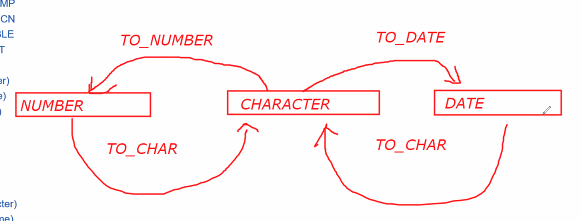

- 통화 : L
- 공백제거 : FM
- 표기법 : EEEE(지수), RN(로마표기자), rn, X(16진수)
- 기호표시 : MI(마지막에 붙이는 음수 표기법), PR(음수인 경우 <> 안에 표기), S(앞에 붙이는 음수 표기법)

In [ ]:
SELECT TO_CHAR(1000, '9999') FROM DUAL; # 자릿수 4개
SELECT TO_CHAR(1000, '00009999') FROM DUAL;
SELECT TO_CHAR('1000', '00009999') FROM DUAL;
SELECT TO_CHAR(12.3, '009.90') FROM DUAL;
SELECT TO_CHAR(12345, '99,999.9') AS RES FROM DUAL;

In [ ]:
SELECT TO_CHAR(12345, 'L99,999.9') AS RES FROM DUAL; # ￦12,345.0
SELECT TO_CHAR(12345, 'FM999,999.9') AS RES FROM DUAL; # 12,345.
SELECT TO_CHAR(12345, '9.9EEEE') AS RES FROM DUAL; # 1.2E+04
SELECT TO_CHAR(5, 'RN') AS RES FROM DUAL; # V

In [ ]:
SELECT TO_CHAR(-123, '999MI') AS RES FROM DUAL; # 123-
SELECT TO_CHAR(-123, '999PR') AS RES FROM DUAL; # <123>
SELECT TO_CHAR(-123, 'S999') AS RES FROM DUAL; # -123

- WW : 1월1일~1월7일까지 1주차
- IW : 1월1일부터 첫번째 일요일까지 1주차, IOS 주표시
- DY : MON
- DAY : Monday
- MON : JAN
- MONTH : January
- RM : 월을 표시할 때 로마식

### 분석함수

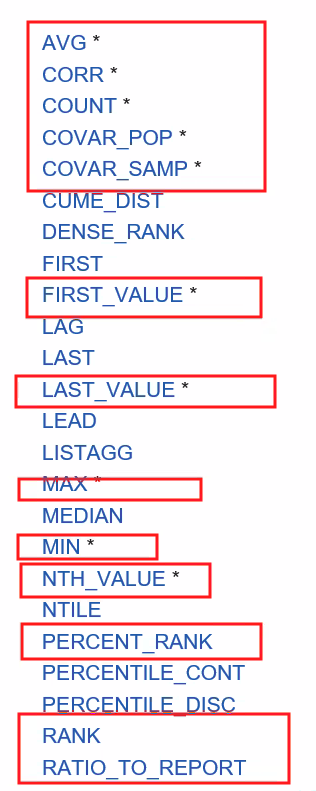